# Grid Search
In this example we will look at what happens to a route as one adjusts the time and energy weights in the test case

In [1]:
from nrel.routee.compass import CompassApp

In [ ]:
# run if you don't have a folder of cached data of Pittsburgh PA
app = CompassApp.from_place("Pittsburgh, Pennsylvania, USA", cache_dir="pittsburgh_pa", add_grade=True)

In [2]:
# run if you already have a Pittsburgh PA folder
app = CompassApp.from_config_file("pittsburgh_pa/osm_default_energy.toml")

The query will be taking a 2016 Leaf from (-79.939920, 40.426163) to (-79.940091, 40.406632)

In [26]:
time = 0.00
energy = 1.00
test_cases = []
for i in range(100):
    test_cases.append({
        "name": f"time: {time:04.2}, energy: {energy:04.2}",
        "weights": {
            "distance": 0,
            "time": time,
            "energy_electric": energy
        }
    })
    time += .01
    energy -= .01
query = [
    {
        "origin_x": -79.939920,
        "origin_y": 40.426163,
        "destination_x": -79.940091,
        "destination_y": 40.406632,
        
        "model_name": "2016_Leaf_24_kWh",
        "vehicle_rates": {
            "distance": {"type": "factor", "factor": 0.655},
            "time": {"type": "factor", "factor": 0.33},
            "energy_electric": {"type": "factor", "factor": .50},            
        },
        "grid_search": {
            "test_cases": test_cases
          }    
    },
] 

In [27]:
result = app.run(query)

In [28]:
from nrel.routee.compass.io.convert_results import results_to_geopandas
results_gdf = results_to_geopandas(result)
results_gdf[['route.traversal_summary.energy_electric', 'route.traversal_summary.time', 'route.traversal_summary.distance']]

,route.traversal_summary.energy_electric,route.traversal_summary.time,route.traversal_summary.distance
route_id,,,
0,0.407436,5.515260,2.253701
1,0.407436,5.515260,2.253701
2,0.407436,5.515260,2.253701
3,0.407436,5.515260,2.253701
4,0.403672,5.550176,2.242111
...,...,...,...
95,0.414981,5.161893,2.031381
96,0.414981,5.161893,2.031381
97,0.414981,5.161893,2.031381


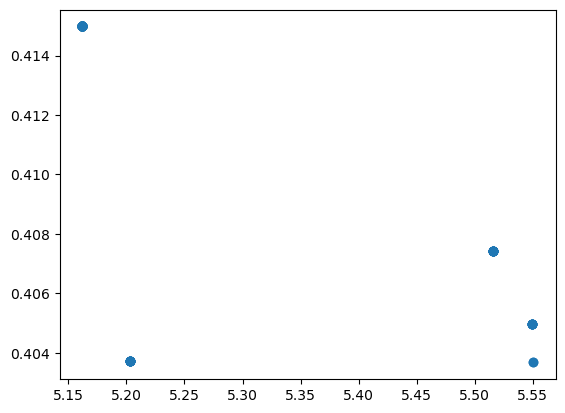

In [29]:
import matplotlib.pyplot as pyplot
pyplot.scatter(results_gdf['route.traversal_summary.time'], results_gdf['route.traversal_summary.energy_electric'])

In [30]:
from nrel.routee.compass.plot import plot_routes_folium
plot_routes_folium(result)